### Задачи: Hooandja Parser
#Пройти тест
#Спарить информацию по подаркам
#Совместить 2 базы
#Перейти к матплотлиб
#отчистка данных

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/projektid1b.csv", na_values="NA")

In [28]:
data.fillna(0, axis=1, inplace=True)
data_array = data.values
print ("Возможный бжджет:", data["Budget"].mean().round(),"€", 'От цели 250000 €')

Возможный бжджет: 3100.0 € От цели 250000 €


In [29]:
# создаём набор индексов, и хотим получить все номера строк 
# которые содержат в столбце А название Б
area_indexes = data[data["Title"].str.contains("kool")].index
print (area_indexes)

Int64Index([  54,   56,   80,   92,  105,  145,  160,  174,  252,  300,  339,
             356,  363,  390,  434,  504,  514,  540,  588,  596,  599,  615,
             618,  624,  658,  713,  718,  731,  740,  742,  743,  763,  769,
             863,  897,  914,  946, 1010, 1014, 1020, 1107, 1129, 1150],
           dtype='int64')


In [30]:
# создаём список и мультииндексы с lambda функцией и присваиваем новые имена
# для выделенных и оставшихся строк
data_areas_index = [(lambda n: "KOOL" if n in area_indexes else "MEDIUM")(i) 
 for i in range(0, len(data.index))]
print (data_areas_index)

['MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'FILM', 'MEDIUM', 'FILM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'FILM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'FILM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM

In [31]:
data["Titl"] = data_areas_index
data = data.set_index(["Titl", "Title"])
data = data.sort_index()
print (data)

                                                           Unnamed: 0  \
Titl   Title                                                            
FILM   "Mäepealse lood" (raamat esimesele kooliastmele...          93   
       2000 koolinoort rahatargaks ja ettevõtlikuks!              619   
       Digiklaver Orissaare Muusikakooli                          600   
       E.T.A. Tantsukooli 8. lennu lõpulavastuse laval...        1021   
       E.T.A. Tantsukooli 9. lennu lõpulavastus „See o...         915   
...                                                               ...   
MEDIUM „Muusika südames“                                          418   
       „Palgaga rikkaks. Kuidas lõpetada enda odavmüük...         205   
       „Tuhkatriinu“ lend Saksamaale                              633   
       „Väikse printsi“ eriväljaanne                              427   
       „Väinamere tütar“                                          789   

                                                  

In [32]:
areas = data.loc["FILM"]
print (areas)

                                                    Unnamed: 0  \
Title                                                            
"Mäepealse lood" (raamat esimesele kooliastmele...          93   
2000 koolinoort rahatargaks ja ettevõtlikuks!              619   
Digiklaver Orissaare Muusikakooli                          600   
E.T.A. Tantsukooli 8. lennu lõpulavastuse laval...        1021   
E.T.A. Tantsukooli 9. lennu lõpulavastus „See o...         915   
ELFi talgute suvekool Nedrema puisniidul                   864   
ELFi talgute suvekool Palupõhjas                           505   
ETA Tantsukooli X lennu lõpulavastus                       732   
Eesti Maaülikooli kammerkoor rahvusvahelisele k...         764   
FACE tantsukooli oma stuudio loomine                       253   
Filmifestival Kino maale animakoolituste korral...         106   
Just Tantsukooli lõpetajate etendus                       1130   
Jõulinnak Tallinna 32. Keskkoolile                         340   
Kaare kool

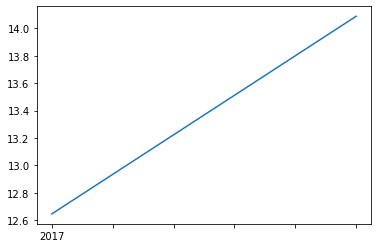

In [34]:
# объединение данных с двух таблиц
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data_2017 = pd.read_csv("http://video.ittensive.com/python-advanced/internet-2017.csv", na_values="NA", skiprows=1, decimal=",", names=["Регион", "2017"], index_col="Регион")
data_2018 = pd.read_csv("http://video.ittensive.com/python-advanced/internet-2018.csv", na_values="NA", skiprows=1, decimal=",", names=["Регион", "2018"], index_col="Регион")
data = pd.merge(data_2017, data_2018, left_index=True, right_index=True)
data.fillna(0, axis=1, inplace=True)
data.mean().plot.line()
plt.show()

In [36]:
import pandas as pd

data_1 = pd.read_csv('http://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')
data_1 = data_1.set_index(['Year', 'Period'])

data_2 = pd.read_csv('http://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')
data_2 = data_2.set_index(['AdmArea', 'Year', 'Month'])
data_2 = data_2.loc['Центральный административный округ']
data_2.index.names = ['Year', 'Period']

data = pd.merge(data_1, data_2, left_index=True, right_index=True)

data = data.reset_index()
data = data.set_index('Calls')
# print(data_1.head())
# print(data_2.head())
print(data['UnemployedMen'][0:1])


Calls
402    15730
Name: UnemployedMen, dtype: int64
